In [1]:
# 載入需要的套件
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
# 用GPU 
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
# 參數們
batch_size = 32
num_classes = 10
epochs = 50

In [4]:
# 載入資料
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape) # 50000 + 10000照片, 每張大小32x32x3(RGB)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
# 改變x的資料型態（uint8 -> float32)
print('before:', x_train.dtype)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print('after:', x_train.dtype)

# 從0~255縮放到0~1
x_train /= 255
x_test /= 255

before: uint8
after: float32


In [6]:
# 幫每個類別取名子
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

original_y_train = y_train.copy()
original_y_test = y_test.copy()

# 改成onehot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(original_y_train[0])
print(y_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


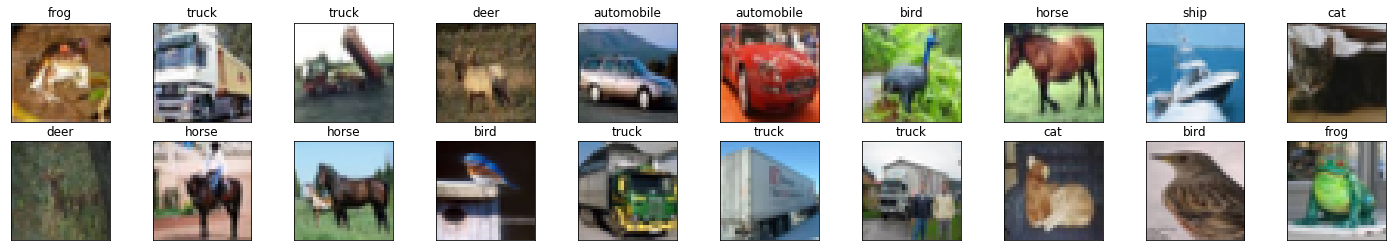

In [7]:
def imshow(img):
    plt.imshow(img)
    
# 拿前20張出來看看
images, labels = x_train[:20], original_y_train[:20]

# 畫出來
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx][0]])

In [8]:
# 建立模型
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:])) 
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # 
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# 優化器
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# 編譯模型
model.compile(loss='categorical_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])

# print model
# print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
# 訓練模型
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)


Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 259us/step - loss: 1.8157 - acc: 0.3316 - val_loss: 1.5259 - val_acc: 0.4363
Epoch 2/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.5129 - acc: 0.4476 - val_loss: 1.3871 - val_acc: 0.4892
Epoch 3/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.3752 - acc: 0.5065 - val_loss: 1.2610 - val_acc: 0.5490
Epoch 4/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.2803 - acc: 0.5460 - val_loss: 1.1878 - val_acc: 0.5787
Epoch 5/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.2035 - acc: 0.5741 - val_loss: 1.1065 - val_acc: 0.6113
Epoch 6/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.1326 - acc: 0.6001 - val_loss: 1.0395 - val_acc: 0.6317
Epoch 7/50
50000/50000 [==============================] - 11s 216us/

In [10]:
# 看它的正確率
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 70us/step
Test loss: 0.6744418352127075
Test accuracy: 0.7771


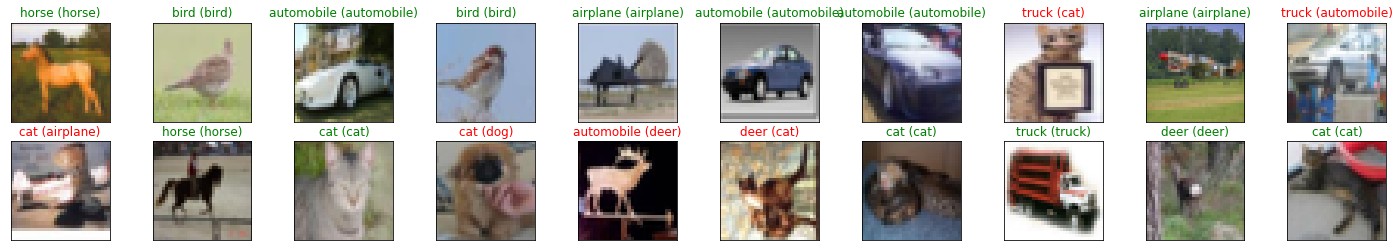

In [11]:
# 隨機取20個出來看看
idx = np.random.randint(10000, size=20)

images, labels = x_test[idx], original_y_test[idx].reshape(20,)
preds = np.argmax(model.predict(x_test[idx]), axis=1)

# 畫出來
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]), color=("green" if preds[idx]==labels[idx] else "red"))